# 监督学习

X->y Learn from being given the "right answers"

## 回归Regression

从无数可能的数字预测出一个数字
predict numbers & large number possible outputs
房价预测
判断垃圾邮件
预测用户是否点击广告

### 线性回归模型

![img.png](img.png)
$\hat{y}$:预测值 $y$:实际值
$$f_{W,b}(x) = Wx+b$$
单个变量(feature)的线性回归，需要找到对应的W和b能很好的拟合数据

#### 重点：构建cost function(代价函数)

##### 定义

$$J{(w,b)} = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - f_{W,b}(x))^2 $$
or
$$J{(w,b)} = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$
m:训练集数据量
损失函数用来衡量模型预测结果与实际结果之间差异的函数。其值越小，代表模型预测结果越接近实际结果。在训练模型时，需要通过不断调整模型参数来最小化损失函数的值。

##### 直觉

$$minimizeJ(w,b) \atop{w,b}$$
Your goal is to find a model $$f_{w,b}(x) = wx + b$$, with parameters  $w,b$,
which will accurately predict house values given an input $x$.
The cost is a measure of how accurate the model is on the training data.

```python 
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

``` 

![img_1.png](img_1.png)

```python

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730, ])

plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)
```

$$f_{w}(x) = wx$$

$$f_{w,b}(x) = wx + b$$
w,b自变量。所以是三维图形，可以取切面最密集的点就是拟合最好的w和b
![img_2.png](img_2.png)

### 梯度下降算法Gradient descent algorithm

本质上是通过对当前$w,b$所在的位置进行修正，找到(1)式最低点的算法。  
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing
a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$.
The measure is called the $cost$, $J(w,b)$.
In training, you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$
重复直到收敛
$$\begin{align*} \lbrace \newline
\; w &= w - \alpha \frac{\partial J(w,b)}{\partial w} \tag{3} \; \newline
b &= b - \alpha \frac{\partial J(w,b)}{\partial b} \newline \rbrace
\end{align*}$$
$\alpha$：0,1之间。代表梯度下降的速率(learning rate)。越大越激进

1.重复更新w,b的值直到算法收敛，即w,b每次更新都不会发生太大变化了

2.$w,b$同时更新，异步更新可能会造成问题

Where parameters$w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$\begin{align}
\frac{\partial J(w,b)}{\partial w} &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}$$
![img_3.png](img_3.png)
![img_4.png](img_4.png)
3.越接近local minimum
-  $$\frac{\partial J(w,b)}{\partial w}$$Derivative becomes smaller
- $\delta{w}$Update steps become smaller
$\alpha$过大或过小造成的影响
过大：达不到最低点，无法收敛(converge) 甚至发散(diverge)
过小：步骤多且耗时
![img_5.png](img_5.png)

### 多元线性回归Multiple Variable Linear Regression

#### 向量化Vectorization

向量化:np.dot(w,x) + b
No 向量化(循环计算):$$f = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + b$$


![img_6.png](img_6.png)
使用向量计算dot而非循环计算的好处：利用并行计算提升效率

![img_7.gif](img_7.gif)
<center>点乘过程</center>

![img_8.png](img_8.png)

#### 多类特征Multiple features
单个特征—>多个特征:$x->x_1,x_2,...$  
占地面积->占地面积，卧室数量...  
使用list存储  
![](img_9.png)

examples are stored in a NumPy matrix X_train. Each row of the matrix represents one example. When you have $m$
training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$
is a matrix with dimensions ($m$, $n$) (m rows, n columns).

$$
\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)} = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_
{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the
subscript represents an element.

#### 学习率learning rate
![](img_10.png)
![](img_11.png)

$\alpha$控制了参数更新的速率

![](img_12.png)

![](img_13.png)

提高学习率$\alpha$和增加迭代次数，作用都不大，如何解决？

#### 特征缩放Feature Scaling
        重新缩放数据集，使特征具有相似的范围。标准化特征，让特征分布均匀。
![](img_14.png)

##### 如何发现特征需要被缩放
![](img_15.png)

如上图，$w_0$只需要10次迭代就收敛了，而其他参数需要迭代非常多次  
造成这个现象的原因是$x_0$(平方英寸，千级别)非常的大，是别的feature的上千倍，所以乘以相同的倍数，该feature迭代梯度远大于其他，速度更快。  
上图展示了w更新不均匀的原因。   
  $\alpha$由所有参数更新（w和b）共享。  
  常见错误项乘以$w$的特征。  
  特征的大小差异很大，使得一些特征的更新速度比其他特征快得多。在这种情况下，$w_0$乘以“大小（平方英尺）”，通常>1000，而w_1乘以“卧室数量”，通常为2-4。  

##### 三种技巧

- 特征缩放, 让每个特征除以人为规定的值，结果落在-1和1之间。
- 均值归一化Mean normalization: $$x_i := \dfrac{x_i - \mu_i}{max - min} $$ 
- z-score归一化 Z-score normalization，所有特征的均值为0，标准差为1。
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag 4$$
where $j$ selects a feature or a column in the X matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}$$

#### 多元线性回归model
  $$f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
  or in vector notation:
  $$f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
  where $$\cdot$$ is a vector dot product(向量乘)
  To demonstrate the dot product, we will implement prediction using (1) and (2).

#### 线性回归的评价指标

**均方误差（Mean Squared Error，MSE）**：

MSE 是模型预测值与真实值差的平方的平均值。它强调大的误差。

$$\begin{align}MSE = \frac{\Sigma (y_i - \hat{y}_i)^2}{n}\end{align}$$

适用场景：适用于回归任务中，尤其是对大的预测误差更加敏感的场景。
      

    
**均方根误差（Root Mean Squared Error，RMSE）**：

RMSE 是 MSE 的平方根，用于将误差带回与原始目标变量相同的量纲

$$\begin{align} RMSE = \sqrt{\frac{\Sigma (y_i - \hat{y}_i)^2}{n}} \end{align}$$

适用场景：与 MSE 类似，但 RMSE 更直观，误差与目标变量的尺度一致。

**平均绝对误差（Mean Absolute Error，MAE）**：

MAE 是预测值与真实值的绝对差的平均值，较少受大误差的影响。

$$\begin{align}MAE = \frac{\Sigma |y_i - \hat{y}_i|}{n}\end{align}$$  

**决定系数（Coefficient of Determination，R-squared，R²）**：
R²度量了线性回归模型对数据的拟合程度。它的取值范围在0到1之间，越接近1表示模型拟合得越好。
适用场景：用于评估回归模型的解释能力。

$$\begin{align}R² = 1 - \frac{\Sigma (yi - ŷi)²}{ \Sigma (yi - ȳ)²}\end{align}$$
其中 yi 表示实际观测值，ŷi 表示模型的预测值，ȳ 表示实际观测值的均值。
对于线性回归模型来说，除了SSE以外，我们还可使用决定系数（R-square，也被称为拟合优度检验）作为其模型评估指标。

决定系数的计算需要使用之前介绍的组间误差平方和和离差平方和的概念。在回归分析中，SSR表示聚类中类似的组间平方和概念，表意为Sum of squares of the regression，由预测数据与标签均值之间差值的平方和计算得出：

预测与均值的距离：
  $$SSR =\sum^{n}_{i=1}(\bar{y_i}-\hat{y_i})^2$$

实际与均值的距离(方差):
$$SST =\sum^{n}_{i=1}(\bar{y_i}-y_i)^2$$

并且，$SST$可由$$SSR+SSE$$计算得出。而决定系数，则由$SSR$和$SST$共同决定：
$$R-square=\frac{SSR}{SST}=\frac{SST-SSE}{SSE}=1-\frac{SSE}{SST}$$
很明显，决定系数是一个鉴于[0,1]之间的值，并且约趋近于1，模型拟合效果越好。

**调整R方值**

调整后的R方值（Adjusted R²）是在多个自变量的回归分析中更准确地评估模型的拟合优度。与普通R方值不同，调整后的R²会考虑自变量数量，不会因为增加不相关的自变量而人为提高模型的拟合度。
$$\begin{align} \text{Adjusted } R² = 1 - \left(\frac{(1 - R²)(n - 1)}{n - k - 1}\right) \end{align}$$其中： $R²$是普通的决定系数；$n$ 是样本数量； $k$ 是自变量的数量。
适用场景：在特征数较多时，调整 R² 比普通 R² 更合理。

## 分类Classification

predict categories & small number of out puts

Binary classification：$y$只能是0和1的其中一个

根据肿瘤大小判断是否癌症

### Sigmod or logistic函数

肿瘤大小(横轴)判定是否癌症(0,1纵轴)，数据分布如图。可以拟合成 曲线，即sigmod函数。
$$g(z) = \frac{1}{1+e^{-z}}\tag{1}$$

![](img_16.png)

在逻辑回归的情况下，z（sigmoid函数的输入）是线性回归模型的输出。 
- 在单个示例的情况下，z是标量。
- 在多个示例的情况下，z可以是由m个值组成的向量，每个示例一个。 
- sigmoid函数的实现应该涵盖这两种潜在的输入格式。

让我们在Python中实现这一点。
```python
def sigmoid(z):
    """6
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g
```

### 逻辑回归Logistic Regression

A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:
$$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$
  where$$g(z) = \frac{1}{1+e^{-z}}\tag{3}$$
Final formula
$$f_{w,b}(x^{(i)}) = \frac1{1 + e^{-wx+b}}\tag{4}$$
输出结果$$f_{w,b}(x^{(i)}) = 0.7$$,
代表患癌概率为70%


![](img_17.png)

#### 损失函数Loss Function

Loss：单个示例与目标值之间差异的指标

Cost：训练集损失的衡量标准

会导致结果出现多个局部最小值。算法确定全局最小值较为困难
      $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$的梯度cost曲线

![](img_18.png)
      
![](img_19.png)

方法：离散数据连续化
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$$ 单个示例的cost, 如下:
$$\begin{equation}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
- \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
\end{cases}
\end{equation}$$
      $$f_{\mathbf{w},b}(\mathbf{x}^{(i)})$$ 是预测值, while $y^{(i)}$ 是目标值.
      $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$$  $g$ 是 sigmoid function.

该损失函数由两条曲线构成，目标值为1和0时曲线的表现不同。越接近目标，曲线斜率越小，即损失函数对参数更不敏感。"速度放缓说明越接近真理",如图:

![](img_20.png)

#### 损失函数简化版
(1)式等价于
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
该式中 $$y^{(i)} = 1 \space or \space0$$
$$\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}$$
$$\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
&=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}$$

下图成本与参数曲线:
```python
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)
```
![](img_21.png)

这条曲线非常适合梯度下降。它没有停滞点(plateau)、局部极小值或不连续点。注意，它不像平方误差那样是碗状的。绘制成本和成本的对数是为了说明这样一个事实，即当成本较小时，曲线有一个斜率并继续下降。
假设使用线性回归损失函数模拟
单示例下成本函数为:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

#### 代价函数Cost Function

将所有的loss组合起来，成为成本函数
$$J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$
- $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$是单个数据点的cost
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
- m是数据集中训练的样本量:
$$\begin{align}
f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}$$

#### 熵、相对熵与交叉熵

$$H(X) = -\sum^n_{i=1}p(x_i)log(p(x_i))$$
其中，$p(x_i)$表示多分类问题中第$i$个类别出现的概率，$n$表示类别总数，通常来说信息熵的计算都取底数为2，并且规定$log0=0$  
熵用于反应分类标签取值均匀程度，越大说明越不均匀，类别分布越不规律。反之=0时，标签只有一个类别  
当标签取值不均时信息熵较高，标签取值纯度较高时信息熵较低。二分类中假设p为未分类数据集中1样本所占比例，则数据集信息熵随着p变化为变化趋势如下  
                                                                    

![](img_22.png)

#### 相对熵

  相对熵也被称为Kullback-Leibler散度（KL散度）或者信息散度（information divergence）。通常用来衡量两个随机变量分布的差异性。假设对同一个随机变量X，有两个单独的概率分布P(x)和Q(x)，当X是离散变量时，我们可以通过如下相对熵计算公式来衡量二者差异：
      
  $$D_{KL}(P||Q)=\sum ^n_{i=1}P(x_i)log(\frac{P(x_i)}{Q(x_i)})$$
  度量Q距离P的差距，可理解为预测值与实际值的差距 

  和信息熵类似，相对熵越小，代表Q(x)和P(x)越接近。
    这其实是一种非对称性度量，也就是$$D_{KL}(P||Q)≠D_{KL}(Q||P)$$。从本质上来说，相对熵刻画的是用概率分布Q来刻画概率分布P的困难程度，而在机器学习领域，我们一般令Q为模型输出结果，而P为数据集标签真实结果，以此来判断模型输出结果是否足够接近真实情况。

$$\begin{aligned}
D_{KL}(P||Q)&=\sum ^n_{i=1}P(x_i)log(\frac{P(x_i)}{Q(x_i)}) \\
&=\sum ^n_{i=1}P(x_i)log(P(x_i))-\sum ^n_{i=1}P(x_i)log(Q(x_i)) \\
&=-H(P(x))+[-\sum ^n_{i=1}P(x_i)log(Q(x_i))]
\end{aligned}$$

而对于给定数据集，信息熵$$H(P(X))$$是确定的，因此相对熵的大小完全由$$-\sum ^n_{i=1}P(x_i)log(Q(x_i))$$决定。而该式计算结果也被称为交叉熵（cross entropy）计算。
$$cross\_entropy(P,Q) = -\sum ^n_{i=1}P(x_i)log(Q(x_i))$$

结论：
简单总结上述过程要点：
- 我们用相对熵$$D_{KL}(P||Q)$$来表示模型拟合分布Q和数据真实分布P之间的差距，相对熵越小拟合效果越好；
- 根据计算公式，$$D_{KL}(P||Q)=-H(P(x))+[-\sum ^n_{i=1}P(x_i)log(Q(x_i))]$$，相对熵=交叉熵-信息熵；
- 对于给定数据集，信息熵是确定的，因此我们只能通过尽可能减小交叉熵来降低相对熵；
据此，我们也可最终推导二分类交叉熵损失函数计算公式，结合极大似然估计的计算公式和交叉熵的基本计算流程，二分类交叉熵损失函数为：
$$binaryCE(\hat w)= -\frac{1}{n}\sum^N_{i=1}[y_i \cdot log(p_1(\hat x;\hat w))+(1-y_i) \cdot log(1-p_1(\hat x;\hat w))] $$

#### 阈值
      人为规定特定的分数作为类别的分界点，比如如果邮件预测分数超过0.6，则表示“垃圾邮件”；如果值低于该阈值，则表示“非垃圾邮件”

#### 混淆矩阵confusion matrix

  一个 NxN 表，总结了分类模型做出的正确和错误预测的数量。
  例如，狼来了故事中，以牧童是否准确预测狼来了的情况做混淆矩阵：
  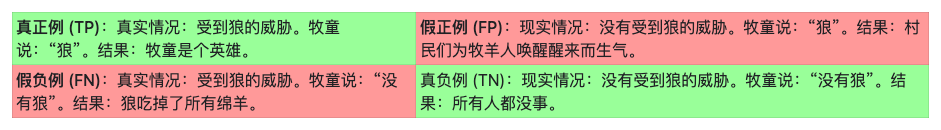

#### 指标

##### 准确率
模型作出的正确预测所占的比例
准确率是评估分类模型的一个指标。通俗地说，准确率是指模型做出的正确预测所占的比例。正式而言，准确率具有以下定义：
$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
对于二元分类，也可以根据正类别和负类别按如下方式计算准确率：
$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$
其中，TP = 真正例，TN = 真负例，FP = 假正例，FN = 假负例。
注意：在类别不平衡的数据集（例如正类别标签和负类别标签的数量之间存在明显差异）时，单单准确率一项并不能反映全面情况。比如患病比例极低(0.01%)的情况下，就算模型不预测，只给出非患病结果，他的准确率也能达到99.99%
          

##### 精确率
正例识别的正确比例
$$\text{Precision} = \frac{TP}{TP+FP}$$
  让我们通过分析上一部分中用于分析肿瘤的机器学习模型来计算精确率：  
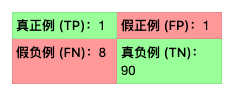

我们的模型的精确率为 0.5，也就是说，如果预测肿瘤是恶性，其正确率为 50%。

##### 召回率

所有实例为正例的样本中，模型正确识别出来的比例
$$\text{Recall} = \frac{TP}{TP+FN}$$
        
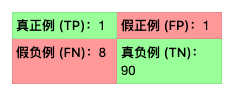
          
Recall=0.11  
该模型的召回率是 0.11，换言之，该模型能够正确识别所有恶性肿瘤的 11%。  

##### F1 值(F1-Score)
F1值是精确率和召回率的调和平均数,用于权衡精确率和召回率之间的关系  
其公式为：  
$$F1 = 2 \cdot \frac{{精确率 \times 召回率}}{{精确率 + 召回率}}$$  
适用场景：当精确率和召回率同等重要时，F1 值是很好的评估标准。  

# 树模型

## LightGBM

### 调参策略

[万字总结LightGBM原理、核心参数以及调优思路（中篇）](https://mp.weixin.qq.com/s?__biz=MzkwMDY1OTM2Nw==&mid=2247484070&idx=1&sn=4ac437356cf7285e1af285ecf29f1b27&chksm=c041e36ef7366a78bfb97060bf364ce40a63479e176f754ef8c7505bee801ca809a79e45ddfd&token=1518552288&lang=zh_CN#rd)

- 调参步骤
  -  确定学习率和树的数量：首先设置较大的学习率（例如0.1），加快收敛速度，并使用交叉验证或大量树来找到最佳的树的数量。
  - 调整树的参数：接着调整树的参数（如树的深度、叶子节点的数目等）。
  - 调整特征和样本的采样率：然后调整特征和样本的采样率来增加模型的泛化能力。
  - 调整正则化参数：然后调整正则化参数来增强模型的泛化能力。
  - 降低学习速率并增加树的数量：最后，降低学习速率，并使用更多的树来获得更好的性能。

- 重点调整参数(基本就是上一节在lightgbm.train中介绍的参数，也是根据数据量和其他实际情况确定，比如数据量小可以不抽样之类的)

- learning_rate（学习速率）：常见的取值在 0.01 到 0.2 之间。较小的学习速率通常需要更多的树来训练。

- num_boost_round（树的数量）：可以从 100 到 1000 不等。更多的树可以提高性能，但也会增加计算时间和过拟合的风险，当数据集较大时可以设置一个较大的值。

- num_leaves（叶子数量）：通常在 20 到 100 之间，注意，num_leaves 应小于 2 ^ (max_depth)，以避免过拟合。

- max_depth（树的最大深度）：通常在 3 到 10 之间。较深的树可以模型更复杂的模式，但也更容易过拟合。

- bagging_fraction（数据采样比例）：通常在 0.5 到 1 之间。较低的比例有助于防止过拟合，但也可能导致欠拟合，一般视数据集的大小而定。

- feature_fraction（特征采样比例）：一般在 0.5 到 0.9 之间。较低的比例有助于防止过拟合，但也可能导致欠拟合，一般视数据集的大小而定。

- min_data_in_leaf（叶子节点的最小数据量）：可以从 20 到 100 或更多。较大的值有助于防止过拟合。

- lambda_l2 (L2正则化)：默认值是 0.0，意味着没有应用L2正则化。常用的取值范围可能是从 0.0 到 1.0 或更高。有时甚至会用到 10 或 100，这完全取决于数据集的特点和过拟合的严重程度。

- lambda_l1 (L1正则化)：默认值是 0.0，L1正则化可以帮助模型在训练过程中做特征选择，因此在处理具有大量特征的数据集时特别有用。常见的取值范围也是从 0.0 到 1.0 或更高。在一些极端的情况下，可能会用到更大的值。